# Research on apartment listings

**Purpose of the study:**
- To determine the parameters affecting the price of real estate in St. Petersburg

## 1. Data overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

/Users/yusuf/opt/anaconda3/envs/praktikum_env_macos2/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth', 400)
sns.set(rc={'figure.figsize':(16, 7)})

In [3]:
data = pd.read_csv('/Users/yusuf/Desktop/Programming/Projects/Data/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- There are gaps in the height of the ceilings, I think we should try to replace the average value by the type of terrain. With the indicator of the total number of floors - the same thing. 
- With the skips on the living space and kitchen a little more difficult, the average can not be replaced, as the sum must be equal to the total area. You can, since the total area is nowhere missing, replace the living area by the average of the number of rooms, and the kitchens are already found as the difference of total and living area.

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- The NaN value in the apartments column can be changed to False, I think this is the reason for the omission.
- To the balconies NaN can be replaced by 0, as this is what is meant I think
- With skips on the populated points is more complicated, we have to think
- Distance to airport - average by population center, same with downtown
- NaN parks are at 0, since they are mostly summer homes
- Distance to the nearest park - the average for the settlement. If a city - is correct, because landscaping is now in full swing, if the village, then 0
- The same with the bodies of water 

## 2. Data preprocessing

Initial processing: I will make a replacement in the wrong value (most likely a mistake when entering the data) and drop gaps in the settlements, because then they will interfere with closing gaps with the median values, these very settlements.

In [5]:
data['floors_total'] = data['floors_total'].replace(14.5, 14) 
data = data.dropna(subset = ['locality_name']) 

Closing gaps on median values (where gaps are due to lack of data). Median values in this case are best done by terrain type

In [6]:
data['ceiling_height'].fillna(value = data.groupby(['locality_name'])['ceiling_height'].transform('median'), inplace = True)
data['floors_total'].fillna(value = data.groupby(['locality_name'])['floors_total'].transform('median'), inplace = True)
data['cityCenters_nearest'].fillna(value = data.groupby(['locality_name'])['cityCenters_nearest'].transform('median'), inplace = True)
data['parks_nearest'].fillna(value = data.groupby(['locality_name'])['parks_nearest'].transform('median'), inplace = True)
data['ponds_nearest'].fillna(value = data.groupby(['locality_name'])['ponds_nearest'].transform('median'), inplace = True)
data['airports_nearest'].fillna(value = data.groupby(['locality_name'])['airports_nearest'].transform('median'), inplace = True)

Closing gaps to zeros (where a gap means zero)

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['is_apartment'].fillna(value = 'False', inplace = True) #Na, means False, which is zero in a sense

Closing gaps on "stubs", so that the necessary data is not cut off. Let's make them negative

In [8]:
data['days_exposition'] = data['days_exposition'].fillna(-10)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-10)

Gaps in area: the living space is closed by the average number of rooms, and the kitchen is calculated as the difference between the total and living space

In [9]:
data['living_area'].fillna(value = data.groupby(['rooms'])['living_area'].transform('median'), inplace = True)
data['kitchen_area'].fillna(value = data['total_area'] - data['living_area'], inplace = True)

Replacing the data type with integers and time format

In [10]:
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Корректировка "высоких" значений высоты потолков от 24 (очевидная ошибка), так как 2.4 это минимальная высота потолка в доме

In [11]:
def ceiling(number):
    if number >= 24: 
        number = number/10
    return number
 
data['ceiling_height'] = data['ceiling_height'].apply(ceiling)

Correction of "large" values of the total area

In [12]:
def area(number):
    if number >= 300:
        number = number/10
    return number

data['total_area'] = data['total_area'].apply(area)

Let's see what we got

In [13]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-10
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.00,9,False,False,False,114.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,733.0,0,593.0,155
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,-10
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289


## 3. Calculations and adding results to the table

Calculating the price per square meter

In [14]:
data['square'] = (data['last_price'] / data['total_area']).astype(int)

Day of the week, month and year of publication

In [15]:
data['first_day_weekday'] = data['first_day_exposition'].dt.weekday
data['first_day_month'] = data['first_day_exposition'].dt.month
data['first_day_year'] = data['first_day_exposition'].dt.year

data['weekday'] = data['first_day_weekday'].replace({0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday' })
data['month'] = data['first_day_month'].replace({1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December' })

Apartment floor: first, last, another

In [16]:
def floor_number(row):
    number = row['floor']
    floors_total = row['floors_total']
    if number == 1:
        return 'First'
    if number == floors_total:
        return 'Last'
    else:
        return 'Another'
    
data['floor_number'] = data.apply(floor_number, axis = 1)

Ratio of living space to total area, as well as the ratio of kitchen area to total area

In [17]:
data['living_ratio'] = ((data['living_area'] / data['total_area']) * 100).round(1).astype(str) + '%'
data['kitchen_ratio'] = ((data['kitchen_area'] / data['total_area']) * 100).round(1).astype(str) + '%'

Let's see what happens.

In [18]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square,first_day_weekday,first_day_month,first_day_year,weekday,month,floor_number,living_ratio,kitchen_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,-10,120370,3,3,2019,Thursday,March,Another,47.2%,23.1%
1,7,3350000,40.40,2018-12-04,1,2.63,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,584.5,81,82920,1,12,2018,Tuesday,December,First,46.0%,27.2%
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785,3,8,2015,Thursday,August,Another,61.2%,14.8%
3,0,64900000,159.00,2015-07-24,3,2.70,14,45.00,9,False,False,False,114.00,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176,4,7,2015,Friday,July,Another,28.3%,71.7%
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,Tuesday,June,Another,32.0%,41.0%
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55,95065,0,9,2018,Monday,September,Another,47.4%,29.9%
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0,733.0,0,593.0,155,99195,3,11,2017,Thursday,November,Another,28.4%,38.6%
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,460.0,0,503.0,-10,110544,3,4,2019,Thursday,April,Another,42.6%,26.4%
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189,87454,2,5,2018,Wednesday,May,Another,46.5%,26.6%
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,460.0,0,503.0,289,88524,6,2,2017,Sunday,February,Another,71.5%,10.7%


## 4. Exploratory data analysis

Parameter research

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0.5, 1.0, 'The price of apartments from the ads')

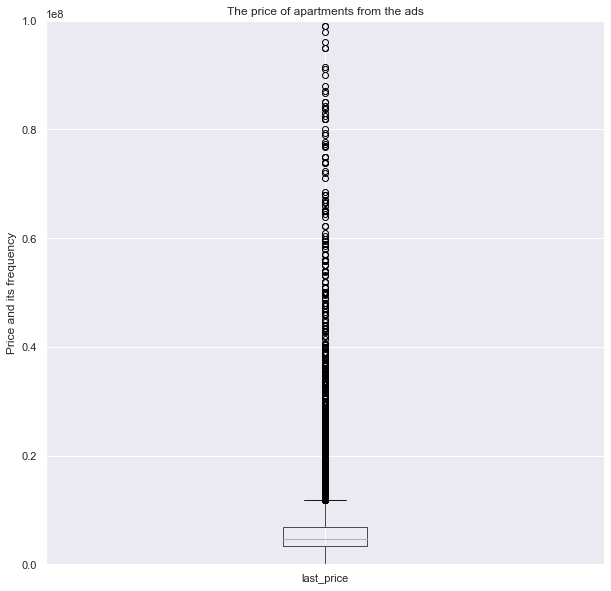

In [19]:
print(data['last_price'].describe())
data.boxplot('last_price', grid=True, figsize=(10,10))
plt.ylim(-1,100000000)
plt.ylabel('Price and its frequency')
plt.title('The price of apartments from the ads')

The normal price of apartments in the range of 12 million rubles, let's see how many of these apartments.

In [20]:
def persentage_of_outliers(condition):
    print('Percentage of output: {:.2%}'.format(len(data.query(condition)) / len(data)),condition)
          
persentage_of_outliers('last_price > 12000000')

Percentage of output: 8.19% last_price > 12000000


That's a lot, so let's try to find and cut off the really rare values. Up to the price of 4 million is a solid line, most likely these are apartments in the center

In [21]:
def persentage_of_outliers(condition):
    print('Percentage of output: {:.2%}'.format(len(data.query(condition)) / len(data)),condition)
          
persentage_of_outliers('last_price > 40000000')

Percentage of output: 0.77% last_price > 40000000


In [22]:
data_new = data.query('last_price < 40000000')

Text(0.5, 1.0, 'The price of apartments from the ads')

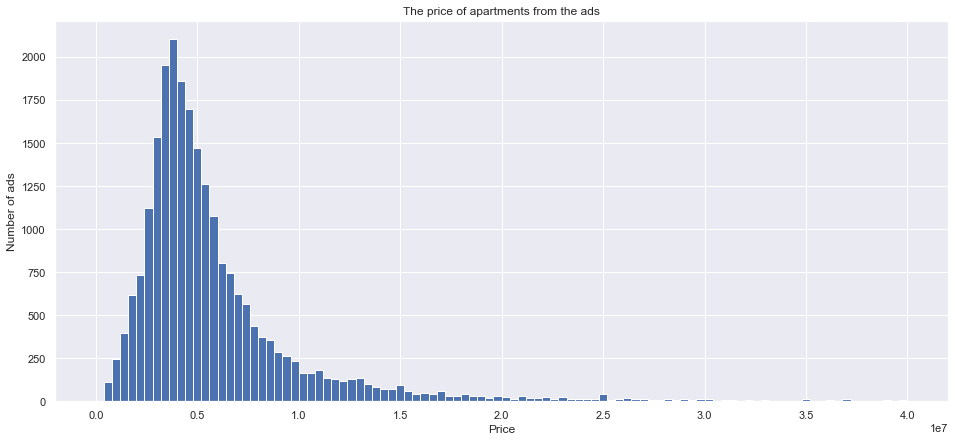

In [23]:
data_new['last_price'].hist(bins=100, range=(0,40000000))
plt.xlabel('Price')
plt.ylabel('Number of ads')
plt.title('The price of apartments from the ads')

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 1.0, 'Number of rooms in the apartments from the ads')

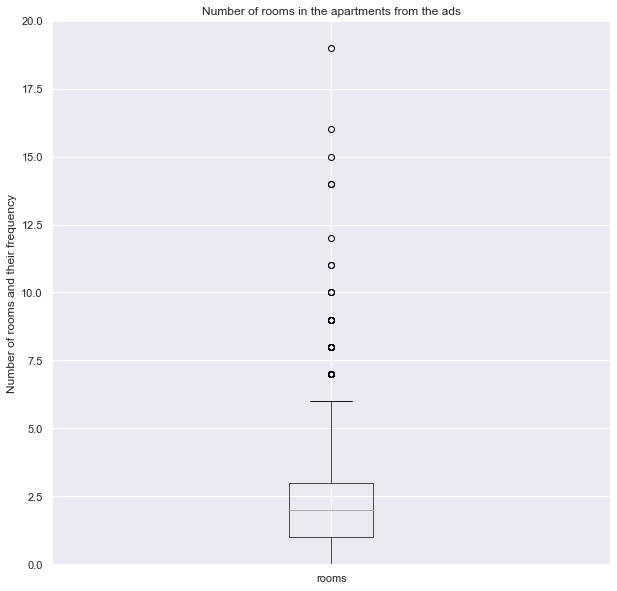

In [24]:
print(data['rooms'].describe())
data.boxplot('rooms', grid=True, figsize=(10,10))
plt.ylim(0,20)
plt.ylabel('Number of rooms and their frequency')
plt.title('Number of rooms in the apartments from the ads')

The upper limit of the normal number of rooms is 6, let's see how much extra

In [25]:
def persentage_of_outliers(condition):
    print('Percentage of output: {:.3%}'.format(len(data_new.query(condition)) / len(data_new)),condition)
          
persentage_of_outliers('rooms > 6')

Percentage of output: 0.281% rooms > 6


We calmly cut off the excess

In [26]:
data_new2 = data_new.query('rooms < 6')

Text(0.5, 1.0, 'Number of rooms in the apartments from the ads')

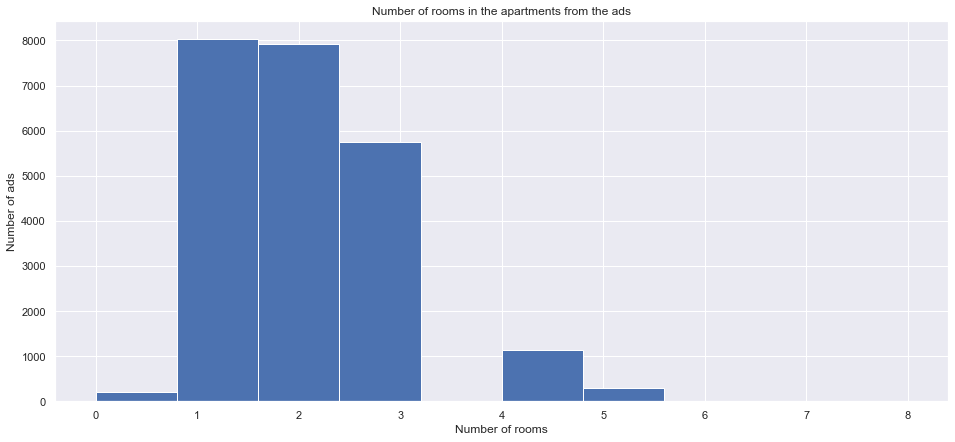

In [27]:
data_new2['rooms'].hist(bins=10, range=(0,8))
plt.xlabel('Number of rooms')
plt.ylabel('Number of ads')
plt.title('Number of rooms in the apartments from the ads')

count    23529.000000
mean         2.708723
std          0.334348
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         22.600000
Name: ceiling_height, dtype: float64


Text(0.5, 1.0, 'Ceiling heights of apartments from ads')

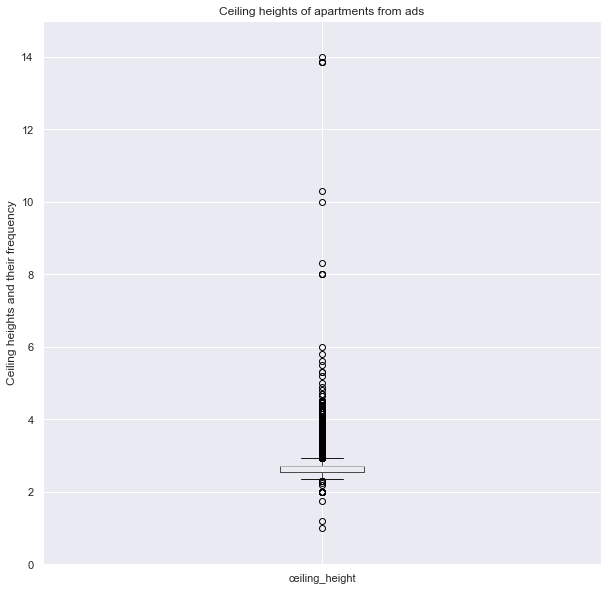

In [28]:
print(data['ceiling_height'].describe())
data.boxplot('ceiling_height', grid=True, figsize=(10,10))
plt.ylim(0,15)
plt.ylabel('Ceiling heights and their frequency')
plt.title('Ceiling heights of apartments from ads')

The upper limit of normal ceiling height is around 3, with a large number of values stretching all the way up to 4, and the lower 2.4 is the minimum ceiling height in the house. Let's see how much extra

In [29]:
def persentage_of_outliers(condition):
    print('Percentage of normal distribution: {:.4%}'.format(len(data_new2.query(condition)) / len(data_new2)),condition)
          
persentage_of_outliers('2.4 <= ceiling_height <= 4')

Percentage of normal distribution: 99.2060% 2.4 <= ceiling_height <= 4


We can safely cut off

In [30]:
data_new3 = data_new2.query('2.4 <= ceiling_height <= 4')

Text(0.5, 1.0, 'Ceiling heights of apartments from ads')

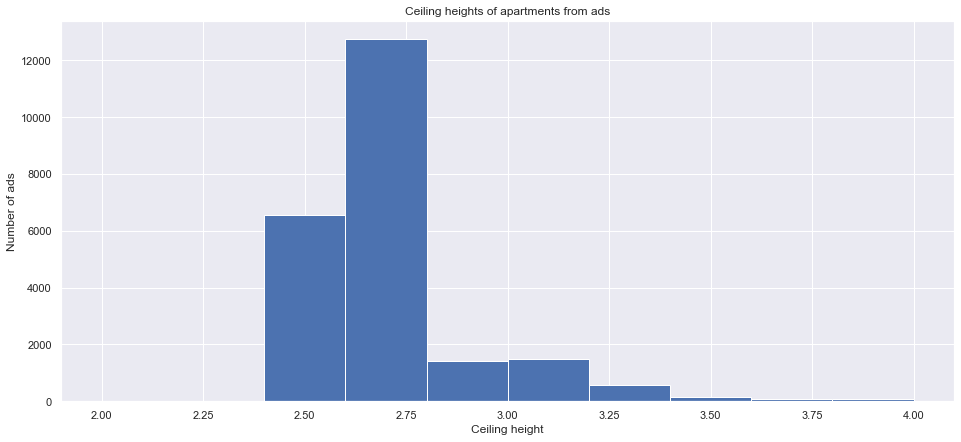

In [31]:
data_new3['ceiling_height'].hist(bins=10, range=(2,4))
plt.xlabel('Ceiling height')
plt.ylabel('Number of ads')
plt.title('Ceiling heights of apartments from ads')

count    23650.000000
mean        59.358687
std         30.438648
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        297.500000
Name: total_area, dtype: float64


Text(0.5, 1.0, 'Square footage from the ads')

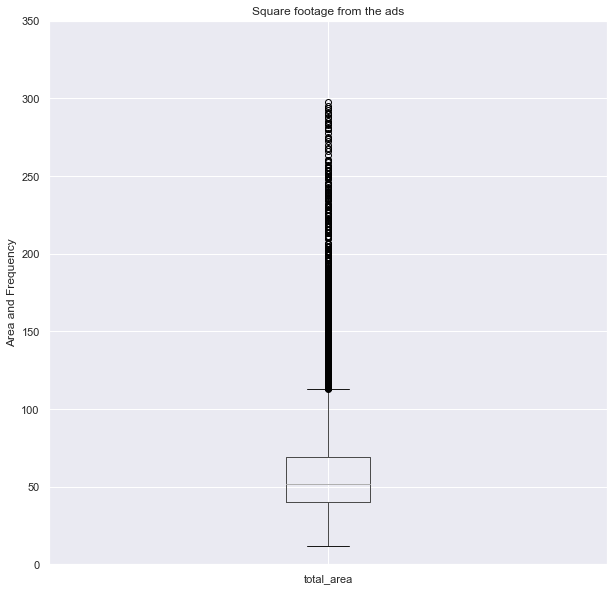

In [32]:
print(data['total_area'].describe())
data.boxplot('total_area', grid=True, figsize=(10,10))
plt.ylim(0,350)
plt.ylabel('Area and Frequency')
plt.title('Square footage from the ads')

The upper limit of the normal general area is 120 meters, let's see how much it is

In [33]:
def persentage_of_outliers(condition):
    print('Percentage of normal distribution: {:.2%}'.format(len(data_new3.query(condition)) / len(data_new3)),condition)
          
persentage_of_outliers('total_area > 150')

Percentage of normal distribution: 1.22% total_area > 150


Fine, you can cut off even more boldly

In [34]:
data_new4 = data_new3.query('total_area < 150')

Text(0.5, 1.0, 'Square footage from the ads')

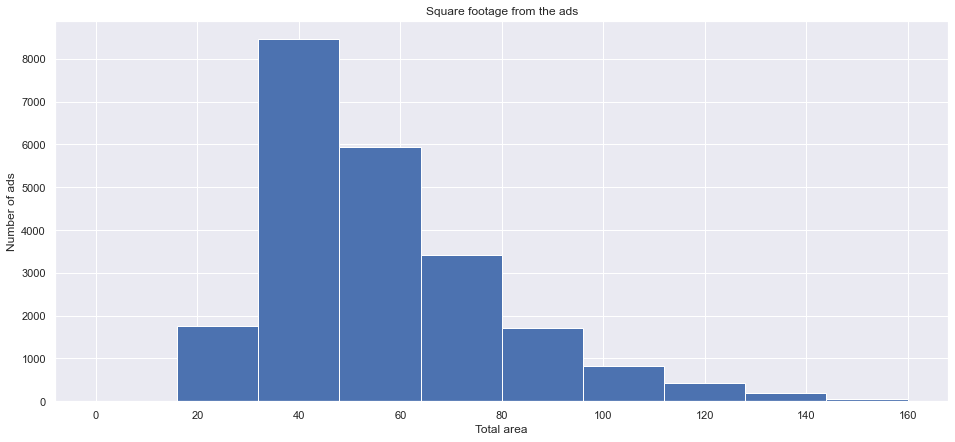

In [35]:
data_new4['total_area'].hist(bins=10, range=(0,160))
plt.xlabel('Total area')
plt.ylabel('Number of ads')
plt.title('Square footage from the ads')

After cleaning, let's estimate the proportion of discarded data to the original dataframe:

In [36]:
print('Fraction of discarded data: {:.2%}'.format(1 - len(data_new4) / len(data)))

Fraction of discarded data: 3.52%


Brief conclusion:

After cutting the emissions by mustache, you can identify trends - by number of rooms (1-2 rooms), price (4 million), ceiling height (2.7), area (40-50 squares)

### The time of sale of the apartment

count    19842.000000
mean       177.945116
std        217.047217
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


(0.0, 1500.0)

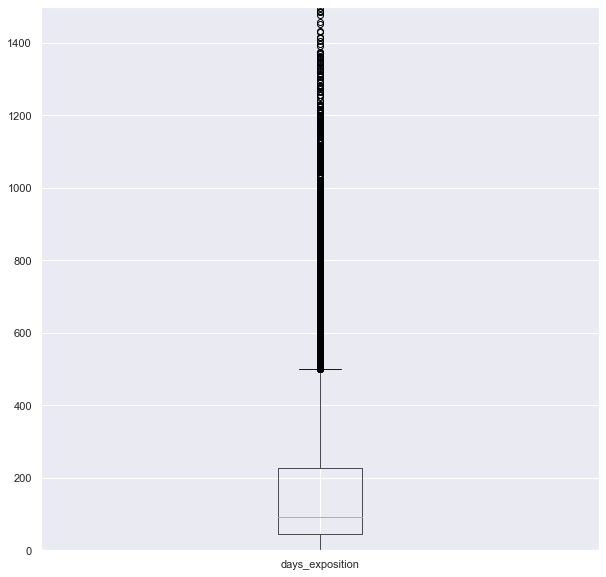

In [37]:
data_days = data_new4.query('days_exposition > 0')
print(data_days['days_exposition'].describe())
data_days.boxplot('days_exposition', grid=True, figsize=(10,10))
plt.ylim(0,1500)

After the top whisker, the density of values begins to decrease only after 1000, let's see how much it is and cut off the excess

In [38]:
def persentage_of_outliers(condition):
    print('Percentage of normal distribution: {:.2%}'.format(len(data_days.query(condition)) / len(data_days)),condition)
          
persentage_of_outliers('days_exposition > 1000')

Percentage of normal distribution: 1.28% days_exposition > 1000


We can cut off

Text(0.5, 1.0, 'The term of placement of apartments from the ads')

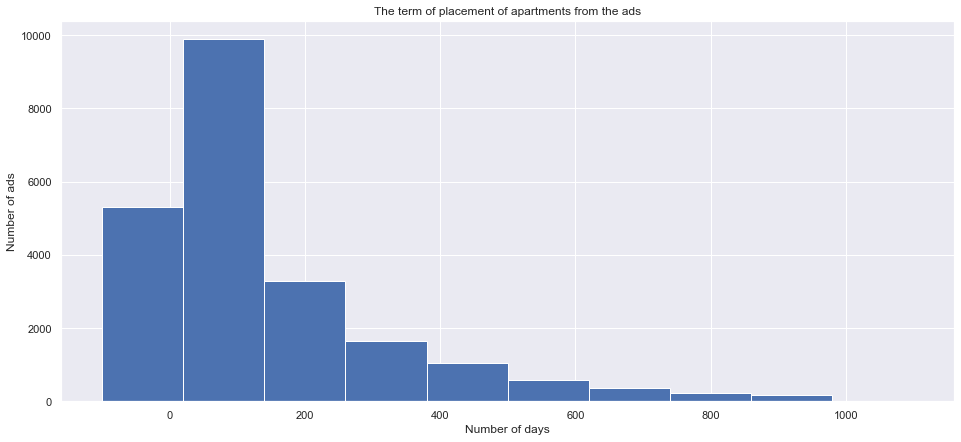

In [39]:
data_new5 = data_new4.query('days_exposition < 1000')
data_new5['days_exposition'].hist(bins=10, range=(-100,1100))
plt.xlabel('Number of days')
plt.ylabel('Number of ads')
plt.title('The term of placement of apartments from the ads')

Once again, let's look at the total amount of discarded data

In [40]:
print('Fraction of discarded data: {:.2%}'.format(1 - len(data_new5) / len(data)))

Fraction of discarded data: 4.60%


Most of the apartments are sold in the first quarter, the next quarter there are about 2.5 times fewer apartments sold, the same with Q3 and Q4. Then slowly the residuals are sold.
The sale of an apartment can be considered very fast if it takes place in the first 3 months after the posting, and very long if the sale takes place 2 years later, after posting.
At the same time, most of the ads are occupied by those not yet sold - this can be seen by the negative plugs.

### Factors affecting the cost of apartments

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


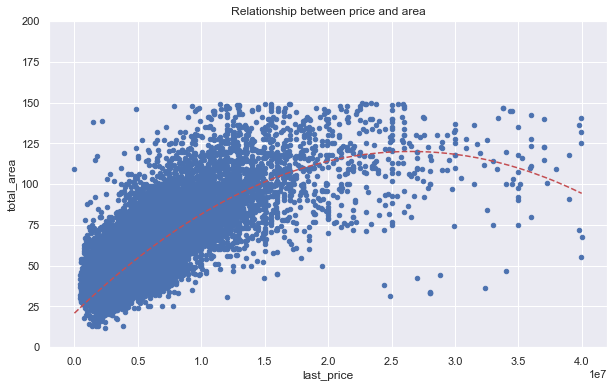

In [41]:
sorted_data_price = data_new5.sort_values('last_price')
sorted_data_price.plot(x='last_price', y='total_area', kind='scatter', title='Relationship between price and area', ylim=(0, 200), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['total_area'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Direct dependence of the price on the area.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


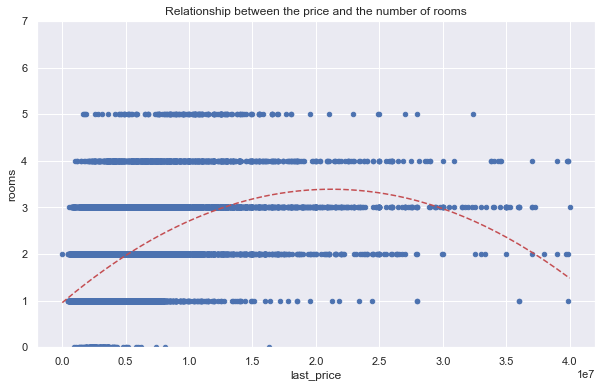

In [42]:
sorted_data_price.plot(x='last_price', y='rooms', kind='scatter', title='Relationship between the price and the number of rooms', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['rooms'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

With the number of rooms the price goes up to 3 rooms. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


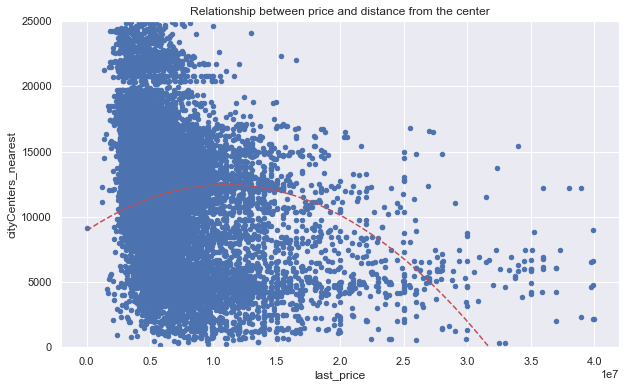

In [43]:
sorted_data_price.query('cityCenters_nearest > 0').plot(x='last_price', y='cityCenters_nearest', kind='scatter', title='Relationship between price and distance from the center', ylim=(0, 25000), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['cityCenters_nearest'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

Price rises approaching the center

<AxesSubplot:xlabel='floor_number'>

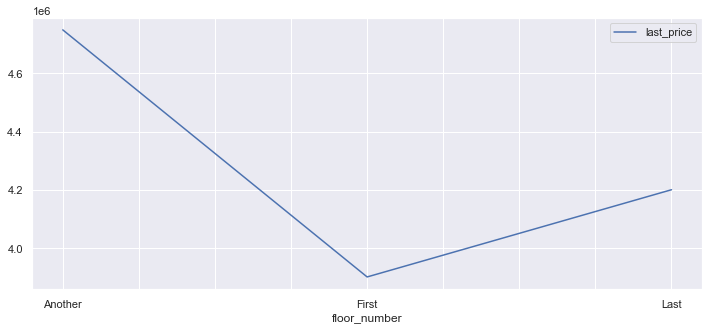

In [44]:
(sorted_data_price.pivot_table(index='floor_number', values='last_price', aggfunc='median')
    .plot(grid=True, figsize=(12, 5)))

The first floor apartments are the cheapest, the average price on the last floor, the most expensive apartments are somewhere between

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


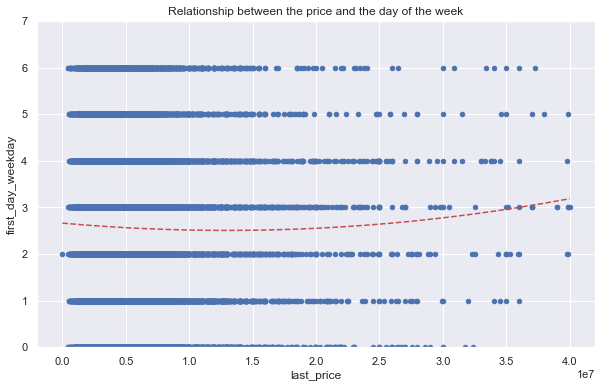

In [45]:
sorted_data_price.plot(x='last_price', y='first_day_weekday', kind='scatter', title='Relationship between the price and the day of the week', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_weekday'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

There is no correlation between the price and the day of the week

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


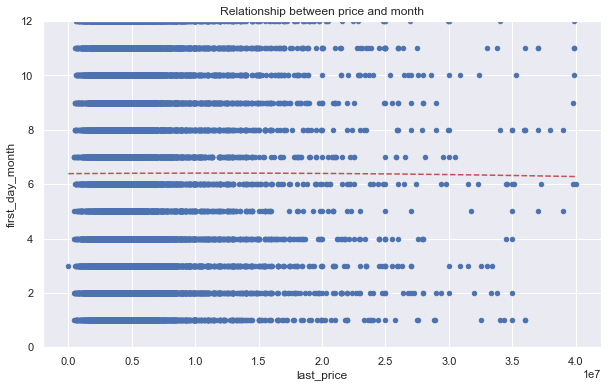

In [46]:
sorted_data_price.plot(x='last_price', y='first_day_month', kind='scatter', title='Relationship between price and month', ylim=(0, 12), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_month'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

There is no correlation between the price and the month

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


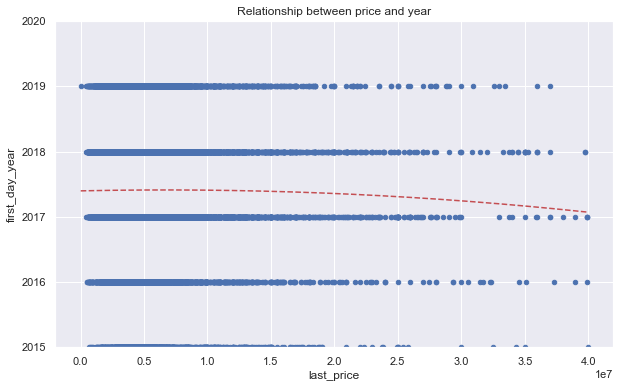

In [47]:
sorted_data_price.plot(x='last_price', y='first_day_year', kind='scatter', title='Relationship between price and year', ylim=(2015, 2020), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_data_price['last_price'], sorted_data_price['first_day_year'], 2)
p = np.poly1d(z)
plt.plot(sorted_data_price['last_price'], p(sorted_data_price['last_price']),"r--")
plt.show()

There is no correlation between price and year. Let's look at the correlation coefficients

In [48]:
data_new5.query('cityCenters_nearest > 0 and days_exposition > 0').corr()[['last_price']]

,last_price
total_images,0.149634
last_price,1.000000
total_area,0.764905
rooms,0.475049
ceiling_height,0.395811
floors_total,0.008769
living_area,0.630331
floor,0.030739
studio,-0.053004
open_plan,-0.031975


The price correlates most strongly to the size of the area, then to the number of rooms and ceiling heights. Also affect the price of parks and ponds nearby, and, oddly enough, the number of photos

### 4.1 10 localities by number of announcements

In [49]:
by_locality_name = data_new5.pivot_table(index = 'locality_name', values = 'square', aggfunc = ['mean', 'count'])
by_locality_name = by_locality_name.sort_values(by=('count', 'square'), ascending = False).head(10)
display(by_locality_name)

,mean,count
,square,square
locality_name,,
Санкт-Петербург,111458.518947,14884
посёлок Мурино,85867.390716,517
посёлок Шушары,78615.348624,436
Всеволожск,68765.447570,391
Пушкин,102930.193182,352
Колпино,75279.280597,335
посёлок Парголово,90259.320000,325
Гатчина,68745.693811,307


The most expensive square meter is expected in St. Petersburg - 111 thousand rubles, the least expensive in Vyborg - 58 thousand rubles per square meter.

### 4.2 Distance to city center

In [50]:
data_new5['center_dist'] = (data_new5['cityCenters_nearest'] / 1000).astype(int)

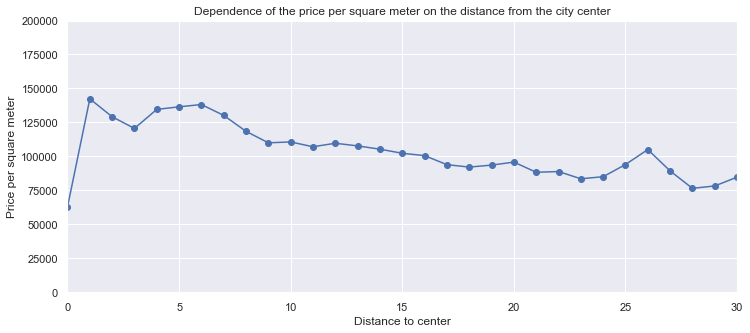

In [51]:
data_new5.groupby('center_dist')['square'].mean().plot(x='center_dist',
y='square',
style='o-',
xlim=(0, 30),
ylim=(0, 200000),
figsize=(12, 5),
grid=True)
plt.xlabel('Distance to center')
plt.ylabel('Price per square meter')
plt.title('Dependence of the price per square meter on the distance from the city center')

data_new5_center = data_new5.query('center_dist <= 8')

Moving away from the center, the price per square meter falls, with a small jump around 27 km - this could be an elite neighborhood. Also a small dip near the value of 3 km, could mean an unfavorable neighborhood near the center. But overall, it's all consistent. The central area is separated in the area of 8 km

In [52]:
display(data_new5_center.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square,first_day_weekday,first_day_month,first_day_year,weekday,month,floor_number,living_ratio,kitchen_ratio,center_dist
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000,1,6,2018,Tuesday,June,Another,32.0%,41.0%,8
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,-10.0,0,NaN,0,NaN,55,95065,0,9,2018,Monday,September,Another,47.4%,29.9%,0
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,189,87454,2,5,2018,Wednesday,May,Another,46.5%,26.6%,0
12,10,3890000,54.00,2016-06-30,2,2.60,5,30.00,5,False,False,False,9.00,0,Сертолово,NaN,-10.0,0,NaN,0,NaN,90,72037,3,6,2016,Thursday,June,Last,55.6%,16.7%,0
22,20,5000000,58.00,2017-04-24,2,2.75,25,30.00,15,False,False,False,11.00,2,деревня Кудрово,NaN,-10.0,0,NaN,0,NaN,60,86206,0,4,2017,Monday,April,Another,51.7%,19.0%,0
24,8,6500000,97.20,2015-10-31,2,2.70,3,46.50,1,False,False,False,19.60,0,Санкт-Петербург,20052.0,2336.0,3,411.0,3,124.0,265,66872,5,10,2015,Saturday,October,First,47.8%,20.2%,2
30,12,2200000,32.80,2018-02-19,1,2.56,9,17.60,2,False,False,False,15.20,0,Коммунар,NaN,-10.0,0,NaN,0,NaN,63,67073,0,2,2018,Monday,February,Another,53.7%,46.3%,0
35,6,15500000,149.00,2017-06-26,5,2.70,5,104.00,4,False,False,False,17.00,0,Санкт-Петербург,23670.0,3502.0,0,460.0,1,779.0,644,104026,0,6,2017,Monday,June,Another,69.8%,11.4%,3
37,10,1990000,45.80,2017-10-28,2,2.50,5,30.50,1,False,False,False,15.30,0,поселок городского типа Красный Бор,NaN,-10.0,0,NaN,0,NaN,196,43449,5,10,2017,Saturday,October,First,66.6%,33.4%,0
38,10,3150000,40.00,2018-03-29,1,2.75,18,16.30,9,False,False,False,11.60,0,посёлок Мурино,NaN,-10.0,0,NaN,0,NaN,103,78750,3,3,2018,Thursday,March,Another,40.8%,29.0%,0


In general, they have no common features, except for the fact that the apartments are located in the center. Let's repeat the analysis for the city center

count    8.963000e+03
mean     5.764625e+06
std      5.023781e+06
min      4.300000e+05
25%      2.600000e+06
50%      4.050000e+06
75%      7.350000e+06
max      3.999000e+07
Name: last_price, dtype: float64


(-1.0, 15000000.0)

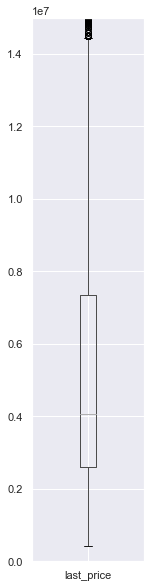

In [53]:
print(data_new5_center['last_price'].describe())
data_new5_center.boxplot('last_price', grid=True, figsize=(2,10))
plt.ylim(-1,15000000)

Text(0.5, 1.0, 'Price of apartments from ads (City Center)')

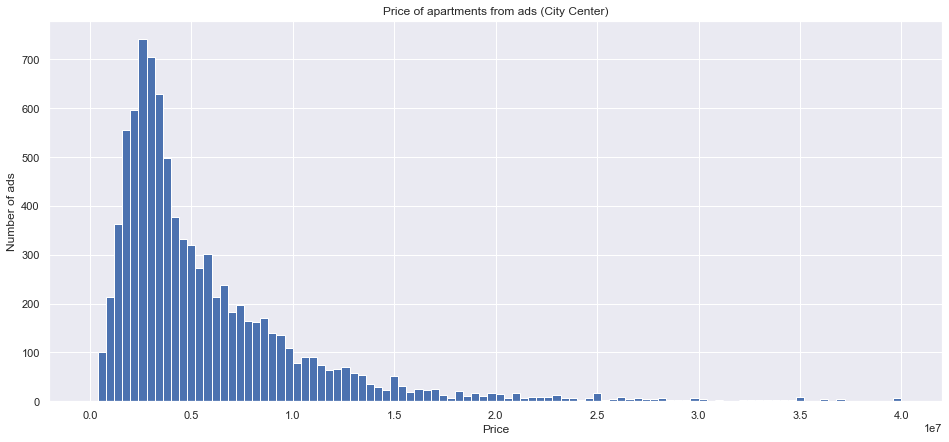

In [54]:
data_new5_center['last_price'].hist(bins=100, range=(0,40000000))
plt.xlabel('Price')
plt.ylabel('Number of ads')
plt.title('Price of apartments from ads (City Center)')

count    8963.000000
mean        2.083119
std         0.977376
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64


(0.0, 6.0)

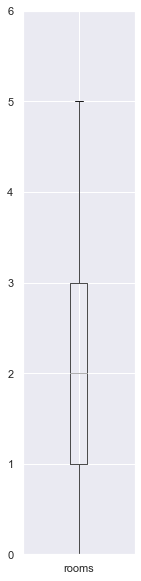

In [55]:
print(data_new5_center['rooms'].describe())
data_new5_center.boxplot('rooms', grid=True, figsize=(2,10))
plt.ylim(0,6)

Text(0.5, 1.0, 'Number of rooms in apartments from ads (City Center)')

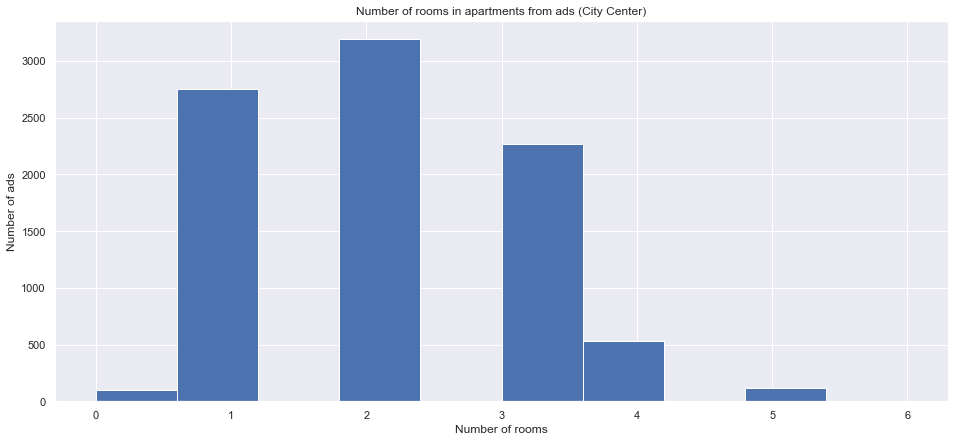

In [56]:
data_new5_center['rooms'].hist(bins=10, range=(0,6))
plt.xlabel('Number of rooms')
plt.ylabel('Number of ads')
plt.title('Number of rooms in apartments from ads (City Center)')

count    8963.000000
mean        2.737080
std         0.255726
min         2.400000
25%         2.550000
50%         2.700000
75%         2.750000
max         4.000000
Name: ceiling_height, dtype: float64


(2.0, 4.0)

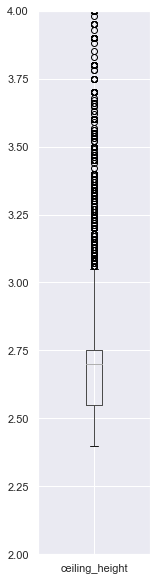

In [57]:
print(data_new5_center['ceiling_height'].describe())
data_new5_center.boxplot('ceiling_height', grid=True, figsize=(2,10))
plt.ylim(2,4)

Text(0.5, 1.0, 'Ceiling heights of apartments from ads (City Center)')

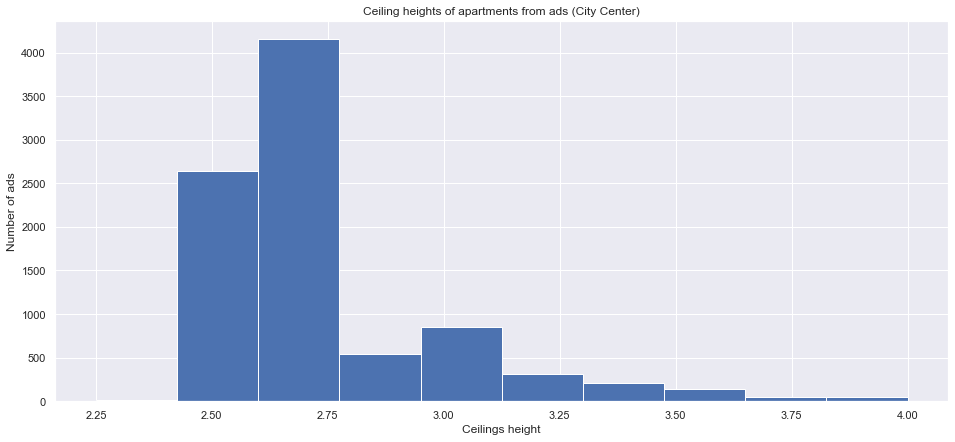

In [58]:
data_new5_center['ceiling_height'].hist(bins=10, range=(2.25,4))
plt.xlabel('Ceilings height')
plt.ylabel('Number of ads')
plt.title('Ceiling heights of apartments from ads (City Center)')

There are fewer apartments here with a height of 2.5, almost all 2.75, unlike the rest of the city.

count    8963.000000
mean       59.535115
std        25.077636
min        12.000000
25%        41.000000
50%        54.000000
75%        72.950000
max       149.300000
Name: total_area, dtype: float64


(0.0, 150.0)

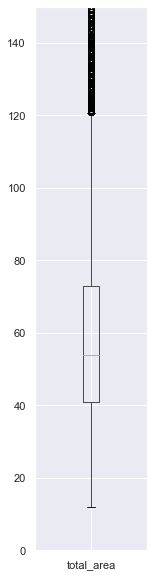

In [59]:
print(data_new5_center['total_area'].describe())
data_new5_center.boxplot('total_area', grid=True, figsize=(2,10))
plt.ylim(0,150)

Text(0.5, 1.0, 'Total area of apartments from the ads (City Center)')

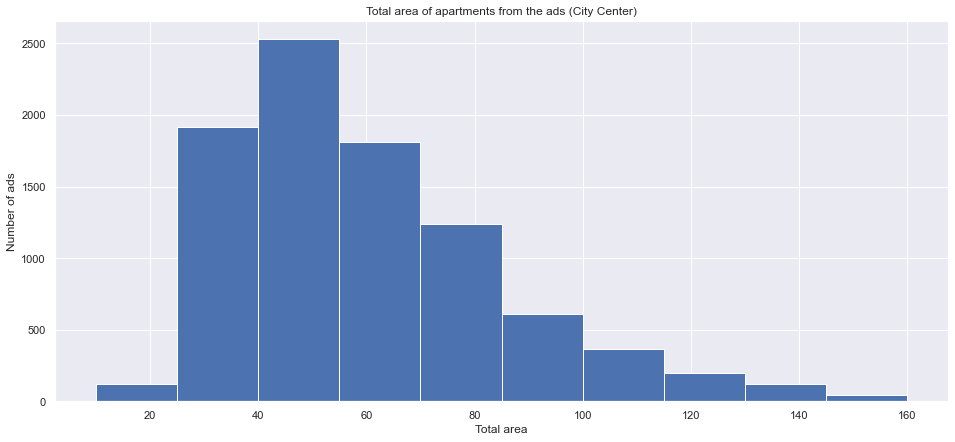

In [60]:
data_new5_center['total_area'].hist(bins=10, range=(10,160))
plt.xlabel('Total area')
plt.ylabel('Number of ads')
plt.title('Total area of apartments from the ads (City Center)')

**A brief conclusion on the center:**
- The most frequent price in the center of 70 million, and the rest of the city 40.
- Number of rooms 2, and the rest of the city 1.
- The ceiling height is 2.7, and in the rest of the city 2.5.
- The total area has decreased, in the center prefer apartments slightly smaller (up to 98 squares)

Now let's estimate the correlation of parameters in the city center

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


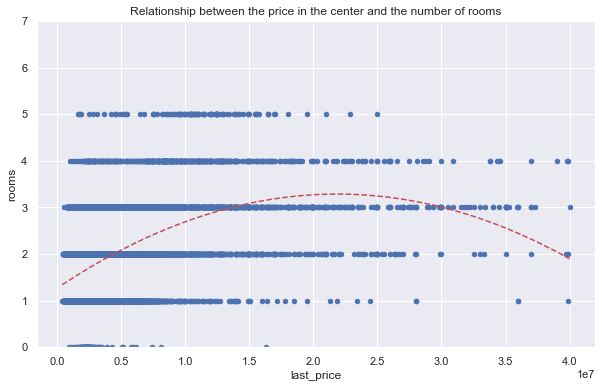

In [61]:
center_sorted_data_price = data_new5_center.sort_values('last_price')
center_sorted_data_price.plot(x='last_price', y='rooms', kind='scatter', title='Relationship between the price in the center and the number of rooms', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['rooms'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

In contrast to the rest of the city, in the center the price continues to rise around 3 rooms, but not much. Rather imperceptible decline, which is in the city

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


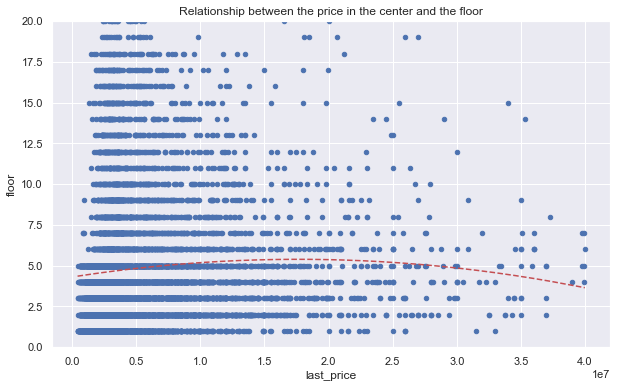

In [62]:
center_sorted_data_price.plot(x='last_price', y='floor', kind='scatter', title='Relationship between the price in the center and the floor', ylim=(0, 20), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['floor'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

It's cheapest on the 4th floor and most expensive around the 6th floor. In the city, the lowest bar is on the 3rd floor and the price increase is not so smooth.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


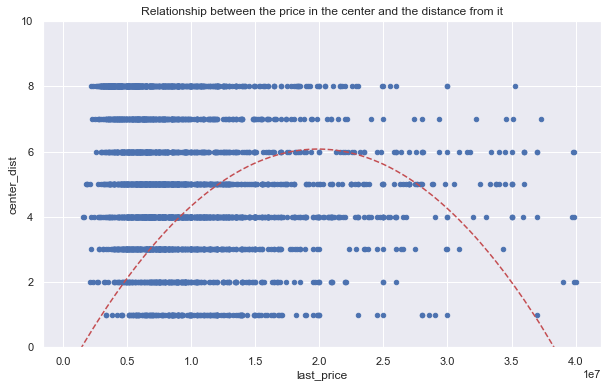

In [63]:
center_sorted_data_price.query('center_dist > 0').plot(x='last_price', y='center_dist', kind='scatter', title='Relationship between the price in the center and the distance from it', ylim=(0, 10), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['center_dist'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

The price rises a little farther away from the center, but not far, it can be elite neighborhoods within the center and then increases again approaching it - the most expensive apartments in the center of St. Petersburg

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


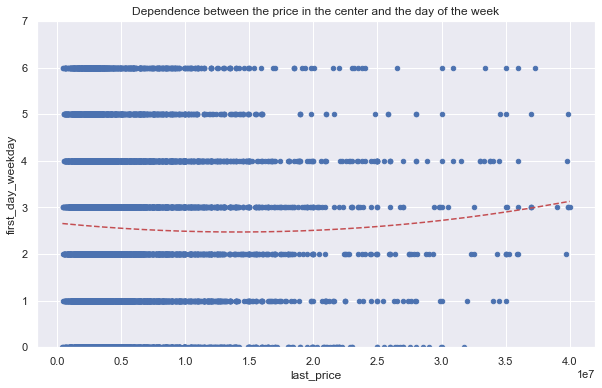

In [64]:
center_sorted_data_price.plot(x='last_price', y='first_day_weekday', kind='scatter', title='Dependence between the price in the center and the day of the week', ylim=(0, 7), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_weekday'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


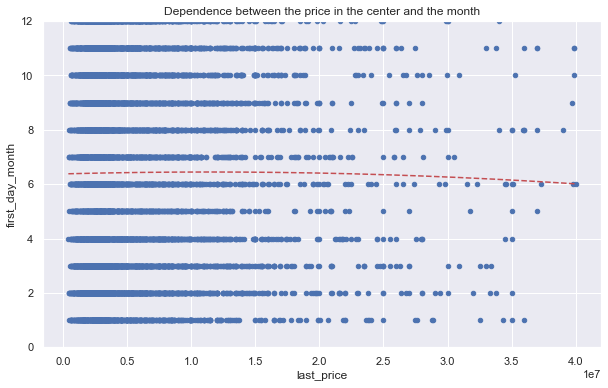

In [65]:
center_sorted_data_price.plot(x='last_price', y='first_day_month', kind='scatter', title='Dependence between the price in the center and the month', ylim=(0, 12), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_month'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


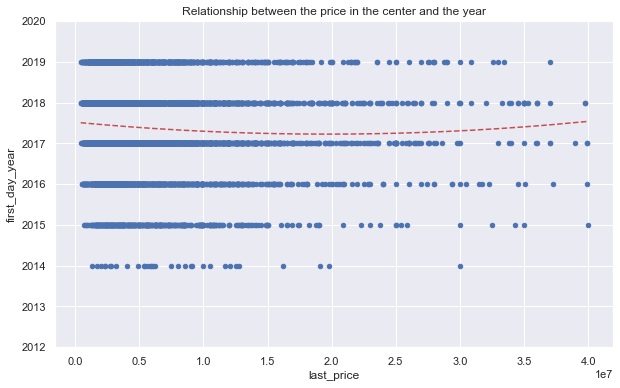

In [66]:
center_sorted_data_price.plot(x='last_price', y='first_day_year', kind='scatter', title='Relationship between the price in the center and the year', ylim=(2012, 2020), grid=True, figsize=(10, 6))

z = np.polyfit(center_sorted_data_price['last_price'], center_sorted_data_price['first_day_year'], 2)
p = np.poly1d(z)
plt.plot(center_sorted_data_price['last_price'], p(center_sorted_data_price['last_price']),"r--")
plt.show()

In general, there is no difference in dates.

Let's look at the correlations in the city center

In [67]:
data_new5_center.query('cityCenters_nearest > 0 and days_exposition > 0').corr()[['last_price']]

,last_price
total_images,0.157422
last_price,1.000000
total_area,0.694411
rooms,0.394879
ceiling_height,0.189578
floors_total,0.082462
living_area,0.529778
floor,0.129481
studio,-0.055458
open_plan,-0.037000


The number of images no longer affects the price as much as the height of the ceilings. Unlike the area and the number of rooms

## 5. General conclusion

- **A brief overview of the work performed:** Data preprocessing was performed, including the handling of skips, erroneous values, and data types. The price per square meter was calculated, and days of the week, months and years, floors and floor space ratios were added. An exploratory analysis of the influencing factors on the price of apartments was conducted.
- **Main conclusions:** analysis of the real estate market in Saint-Petersburg shows that the following factors influence the price most of all: the size of the area, the number of rooms, the ceiling height, as well as parks and ponds nearby - which is logical because these are factors valued in any megalopolis. On average, the city is dominated by one-room apartments, with a ceiling height of about 2.4 meters. In the center of St. Petersburg the ceiling height is not so important, although it is dominated by the value of 2.7 meters - it is a historic part of town, the ceilings are high a priori everywhere, people are more important floor area, a balcony for admiring the architecture of the city, the number of rooms and kitchen size.